In [1]:
import os
import numpy as np
import pandas as pd

from src import DATA_PATH, ROOT_PATH
VERSION = 'v9'


# 前処理

In [2]:
food_values = pd.read_csv(os.path.join(DATA_PATH, "food_value.csv"))
resp = pd.read_csv(os.path.join(DATA_PATH, "data_responses_NCNP_2types.csv"))
res_L_mean = resp.groupby("img")["res_L"].mean()
res_H_mean = resp.groupby("img")["res_H"].mean()
res_T_mean = resp.groupby("img")["res_T"].mean()

In [3]:
from PIL import Image
image_dir = os.path.join(ROOT_PATH, "Database")
image_files = sorted([f for f in os.listdir(image_dir) if f.endswith(".jpg")])

# Load the data
image_rgb = pd.DataFrame(
    [
        np.array(Image.open(os.path.join(image_dir, img)).convert("RGB")).mean(axis=(0, 1))
        for img in image_files
    ],
    columns=["R", "G", "B"],
    index=image_files,
)

In [4]:
gram_value_is_not_nan = np.logical_not(np.isnan(food_values["grams_total"].values))
labels = np.array(
    [
        res_L_mean.values,
        res_H_mean.values,
        res_T_mean.values,
        food_values["kcal_100g"].values,
        food_values["protein_100g"].values,
        food_values["fat_100g"].values,
        food_values["carbs_100g"].values,
        food_values["kcal_total"].values,
        food_values["grams_total"].values,
        image_rgb["R"].values,
        image_rgb["G"].values,
        image_rgb["B"].values,
        # food_values["red"].values,
        # food_values["green"].values,
        # food_values["blue"].values,
        food_values["is_processed_foods"].astype(int).values,
        food_values["is_testy"].astype(int).values,
    ]
)

labels.shape

(14, 896)

# 分析

## Ridge回帰

In [ ]:
from src.analysis import init_ridge_analysis, run_ridge_analysis
from src.const import index_name


pipe_binary, pipe_regression, search_binary, search_regression = init_ridge_analysis()
data_len = 36
save_dir = os.path.join(
    DATA_PATH,
    "output",
    "activation_features_regression",
    VERSION,
)

data_dir = os.path.join(
        ROOT_PATH,
        "tmp",
        VERSION,
        "intermediate_feature",
)

os.makedirs(save_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)
result_df = pd.DataFrame(index=index_name, columns=np.arange(data_len))
result_df = run_ridge_analysis(
    result_df,
    pipe_binary,
    pipe_regression,
    search_binary,
    search_regression,
    labels,
    gram_value_is_not_nan,
    save_dir,
    data_dir,
    data_len,
)

  0%|          | 0/36 [00:00<?, ?it/s]

Layer 0
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.8578805425694938
Label 1 shape: (896,)
res_H_mean
0.6282575299707112
Label 2 shape: (896,)
res_T_mean
0.7986883334628236
Label 3 shape: (896,)
kcal_100g
0.4830491971169758
Label 4 shape: (896,)
protein_100g
0.3317363539393401
Label 5 shape: (896,)
fat_100g
0.316725656228809
Label 6 shape: (896,)
carbs_100g
0.4596473777205078
Label 7 shape: (896,)
kcal_total
0.07759313137027635
Label 8 shape: (896,)
grams_total
-0.002681830397977203
Label 9 shape: (896,)
red
0.6771409519154841
Label 10 shape: (896,)
green
0.7524114003325086
Label 11 shape: (896,)
blue
0.7954078147228598
Label 12 shape: (896,)
binary start
0.8944444444444445
Label 13 shape: (896,)
binary start


  3%|▎         | 1/36 [01:00<35:22, 60.63s/it]

0.7611111111111111
Layer 1
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.8940762275366366
Label 1 shape: (896,)
res_H_mean
0.5855894230430241
Label 2 shape: (896,)
res_T_mean
0.8245345352516569
Label 3 shape: (896,)
kcal_100g
0.4905373546758377
Label 4 shape: (896,)
protein_100g
0.2701752405193978
Label 5 shape: (896,)
fat_100g
0.44503307133003267
Label 6 shape: (896,)
carbs_100g
0.3416312133819043
Label 7 shape: (896,)
kcal_total
0.08632851376218209
Label 8 shape: (896,)
grams_total
-0.20615449913388195
Label 9 shape: (896,)
red
0.6762467642115291
Label 10 shape: (896,)
green
0.7604502053010983
Label 11 shape: (896,)
blue
0.7851708602184516
Label 12 shape: (896,)
binary start
0.8555555555555555
Label 13 shape: (896,)
binary start


  6%|▌         | 2/36 [01:41<27:49, 49.11s/it]

0.7166666666666667
Layer 2
pca start
labels shape (14, 896)
Label 0 shape: (896,)
res_L_mean
0.8113869187905056
Label 1 shape: (896,)
res_H_mean
0.20637877410948657
Label 2 shape: (896,)
res_T_mean
0.747375938399633
Label 3 shape: (896,)
kcal_100g
0.1562184855523543
Label 4 shape: (896,)
protein_100g
0.12308871324654946
Label 5 shape: (896,)
fat_100g
0.11305763552517556
Label 6 shape: (896,)
carbs_100g
0.22423016529324336
Label 7 shape: (896,)
kcal_total


In [8]:
import os
import numpy as np
import pandas as pd
import torch
import matplotlib.pyplot as plt
import seaborn as sns

from src import DATA_PATH, ROOT_PATH
from src.analysis import create_label_similarity_matrix, calc_matrix_corr

sns.set_theme(font="BIZ UDPGothic")
sns.set_style("whitegrid")
# plt.rcParams["font.family"] = ["BIZ UDPGothic"]
plt.rcParams["font.family"] = ["Arial"]

In [ ]:
# result_df.to_csv(os.path.join(DATA_PATH, "output", "activation_regression", "pca", "v2_result_activation_features_regression.csv"))
result_df = pd.read_csv(
    os.path.join(
        DATA_PATH,
        "output",
        "activation_regression",
        "pca",
        "v2_result_activation_features_regression.csv",
    ),
    index_col=0,
)
food_values = pd.read_csv(os.path.join(DATA_PATH, "food_value.csv"))
resp = pd.read_csv(os.path.join(DATA_PATH, "data_responses_NCNP_2types.csv"))
res_L_mean = resp.groupby("img")["res_L"].mean()
res_H_mean = resp.groupby("img")["res_H"].mean()
res_T_mean = resp.groupby("img")["res_T"].mean()


## RSA

In [10]:
# L_similarity_matrix = create_label_similarity_matrix(res_L_mean.values)
# H_similarity_matrix = create_label_similarity_matrix(res_H_mean.values)
# T_similarity_matrix = create_label_similarity_matrix(res_T_mean.values)

# kcal_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["kcal_100g"].values
# )
# protein_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["protein_100g"].values
# )
# fat_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["fat_100g"].values
# )
# carbs_100g_similarity_matrix = create_label_similarity_matrix(
#     food_values["carbs_100g"].values
# )
# kcal_similarity_matrix = create_label_similarity_matrix(
#     food_values["kcal_total"].values
# )
# processed_similarity_matrix = create_label_similarity_matrix(
#     food_values["is_processed_foods"].values
# )
# testy_similarity_matrix = create_label_similarity_matrix(food_values["is_testy"].values)
# grams_similarity_matrix = create_label_similarity_matrix(
#     food_values["grams_total"].values
# )
# red_similarity_matrix = create_label_similarity_matrix(food_values["red"].values)
# green_similarity_matrix = create_label_similarity_matrix(food_values["green"].values)
# blue_similarity_matrix = create_label_similarity_matrix(food_values["blue"].values)

In [11]:
# matrixs = torch.load(
#     os.path.join(ROOT_PATH, "tmp", VERSION, "intermediate_feature", "layer_matrixs.pth")
#     )
# matrixs = matrixs[:-1, :, :]


# 可視化

## Ridge回帰

,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.193904,0.22251,0.255627,0.318614,0.481493,0.619665,0.793548,0.84287,0.881034,0.881475,0.89768,0.913127


,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.3305,0.397679,0.579795,0.590008,0.618568,0.697049,0.757237,0.755609,0.760901,0.755001,0.758659,0.677383


,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.860678,0.916078,0.942427,0.942787,0.940315,0.938432,0.933631,0.933418,0.926241,0.926936,0.914046,0.826287


,0,1,2,3,4,5,6,7,8,9,10,11
Score,0.139404,0.290153,0.391564,0.447248,0.477374,0.525342,0.57923,0.561049,0.564152,0.562572,0.562279,0.512449


,1,2,3,4,5,6,7,8,9,10,...,3,4,5,6,7,8,9,10,11,12
Score,0.193904,0.22251,0.255627,0.318614,0.481493,0.619665,0.793548,0.84287,0.881034,0.881475,...,0.391564,0.447248,0.477374,0.525342,0.57923,0.561049,0.564152,0.562572,0.562279,0.512449
attr,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,Subjective value,...,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value,Nutritional value


/tmp/ipykernel_3812064/1701499785.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels, fontsize=32, fontweight="bold")
/tmp/ipykernel_3812064/1701499785.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(
/tmp/ipykernel_3812064/1701499785.py:76: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(new_labels, fontsize=32, fontweight="bold")
/tmp/ipykernel_3812064/1701499785.py:60: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(


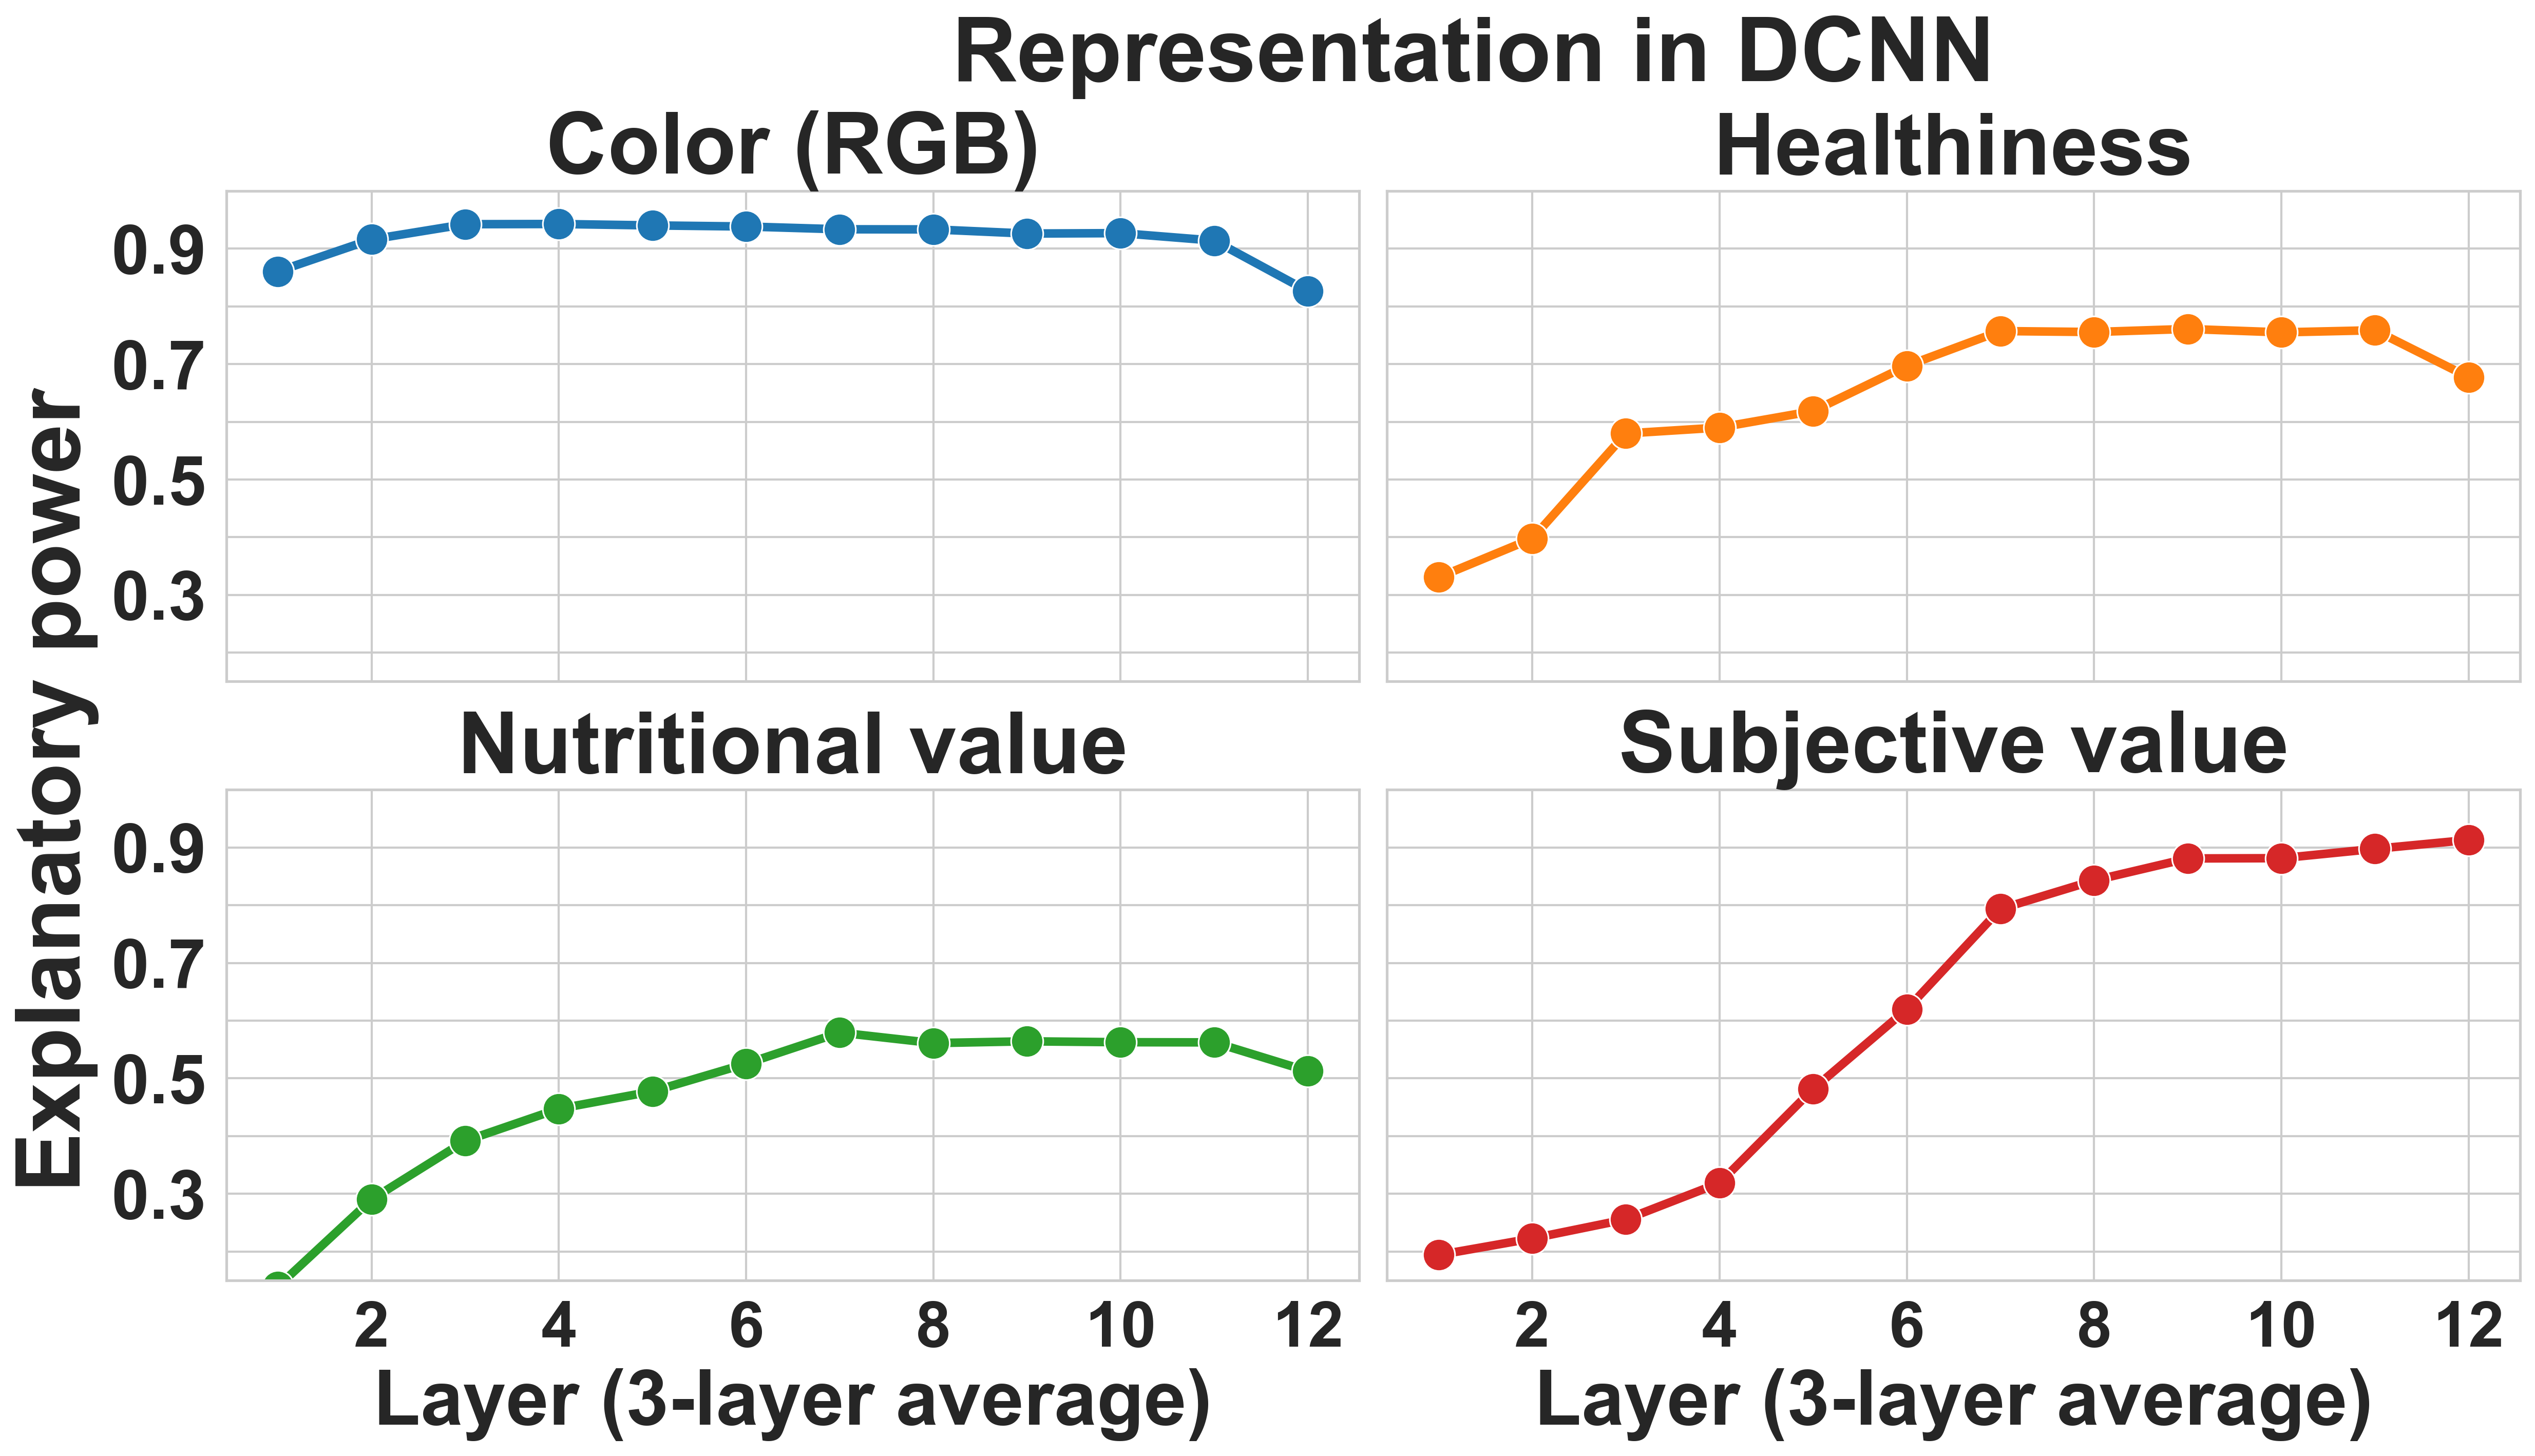

In [ ]:


melt_df = (
    result_df.reset_index()
    .melt(
        id_vars="index",
        var_name="Layer",
        value_name="Score",
    )
    .rename(columns={"index": "attribute"})
)
melt_df["Layer"] = melt_df["Layer"].astype(str).str.extract(r"(\d+)").astype(int)
df_list = []
group_dict = {
    "Subjective value": ["res_L_mean"],
    "Healthiness": ["res_H_mean"],
    "Color (RGB)": ["blue", "green", "red"],
    "Nutritional value": ["kcal_100g", "protein_100g", "fat_100g", "carbs_100g"],
}

for key, attrs in group_dict.items():
    attr_df = pd.DataFrame(
        melt_df[melt_df["attribute"].isin(attrs)]
        .groupby("Layer")["Score"]
        .mean().sort_index()
        .rolling(window=3, min_periods=1, step=3)
        .mean()
        .dropna()
        .reset_index(drop=True)
    )
    display(attr_df.T)
    attr_df["attr"] = key
    attr_df.index += 1
    df_list.append(attr_df)

data = pd.concat(df_list)
display(data.T)

fig, axes = plt.subplots(2, 2, figsize=(16, 9), dpi=300)
# 4つのカテゴリに対して異なる色を設定
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"]  # tab10パレットの最初の4色

for i, (attr, d) in enumerate(data.groupby("attr")):
    ax = axes.flatten()[i]
    sns.lineplot(
        data=d.reset_index(),
        x="index",
        y="Score",
        color=colors[i],
        marker="o",
        markersize=15,
        linewidth=4,
        ax=ax
    )
    melt_df["Layer"] = melt_df["Layer"].astype("int")
    melt_df["attribute"] = melt_df["attribute"].astype("category")
    melt_df["Score"] = melt_df["Score"].astype(float)
    ax.set_ylim(0.15, 1)

    if i > 1:
        ax.set_xlabel("Layer (3-layer average)", fontsize=36, fontweight="bold")
        ax.set_xticklabels(
            range(0, 13, 2),
            fontsize=30,
            fontweight="bold",
        )
    else:
        ax.set_xlabel("")
        ax.set_xticklabels([])
    if i % 2 == 0:
        # ax.set_ylabel(
        #     "Explanatory power", fontsize=40, labelpad=20, fontweight="bold"
        # )
        ax.set_ylabel("")
        # 2 step刻みの目盛りを設定
        labels = ax.get_yticklabels()
        new_labels = [label if i % 2 == 0 else "" for i, label in enumerate(labels)]
        ax.set_yticklabels(new_labels, fontsize=32, fontweight="bold")
    else:
        ax.set_ylabel("")
        ax.set_yticklabels([])

    ax.set_title(attr, fontsize=40, fontweight="bold", pad=-2)
# plt.title("CLIPの内部表現", fontsize=36, fontweight="bold", pad=20)
plt.tight_layout()
# 90 度回転
plt.text(
    s="Explanatory power",
    x=-14.2,
    y=1,
    fontsize=42,
    fontweight="bold",
    va="center",
    rotation=90,
)
plt.text(
    x=-4.2,
    y=2.27,
    s="Representation in DCNN",
    fontsize=42,
    fontweight="bold",
    va="center",
)
plt.show()
fig.savefig(
    os.path.join(DATA_PATH, "output", "activation_regression","pca", f"v4_result.png"), bbox_inches="tight"
)


## RSA

In [23]:
df_corr = calc_matrix_corr(matrixs, L_similarity_matrix)
likeness_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Likeness"
)
df_corr = calc_matrix_corr(matrixs, H_similarity_matrix)
healthiness_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Healthiness"
)
df_corr = calc_matrix_corr(matrixs, T_similarity_matrix)
tastiness_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Tastiness"
)
gram_value_is_not_nan = ~np.isnan(food_values["grams_total"].values)
df_corr = calc_matrix_corr(matrixs, kcal_100g_similarity_matrix)
kcal_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Kcal_100g"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    protein_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
protein_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="protein_100g"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    fat_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
fat_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="fat_100g"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    carbs_100g_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
carbs_100g_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="carbs_100g"
)


df_corr = calc_matrix_corr(matrixs, kcal_similarity_matrix)
kcals_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Kcals"
)


df_corr = calc_matrix_corr(matrixs, processed_similarity_matrix)
processed_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Processed"
)


df_corr = calc_matrix_corr(matrixs, testy_similarity_matrix)
testy_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Testy"
)


df_corr = calc_matrix_corr(
    matrixs[:, gram_value_is_not_nan, :][:, :, gram_value_is_not_nan],
    grams_similarity_matrix[gram_value_is_not_nan, :][:, gram_value_is_not_nan],
)
grams_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Grams"
)


df_corr = calc_matrix_corr(matrixs, red_similarity_matrix)
red_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Red"
)


df_corr = calc_matrix_corr(matrixs, green_similarity_matrix)
green_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Green"
)


df_corr = calc_matrix_corr(matrixs, blue_similarity_matrix)
blue_corr = pd.Series(
    df_corr["pearson_correlation"].values, index=df_corr.index + 1, name="Blue"
)



NameError: name 'matrixs' is not defined

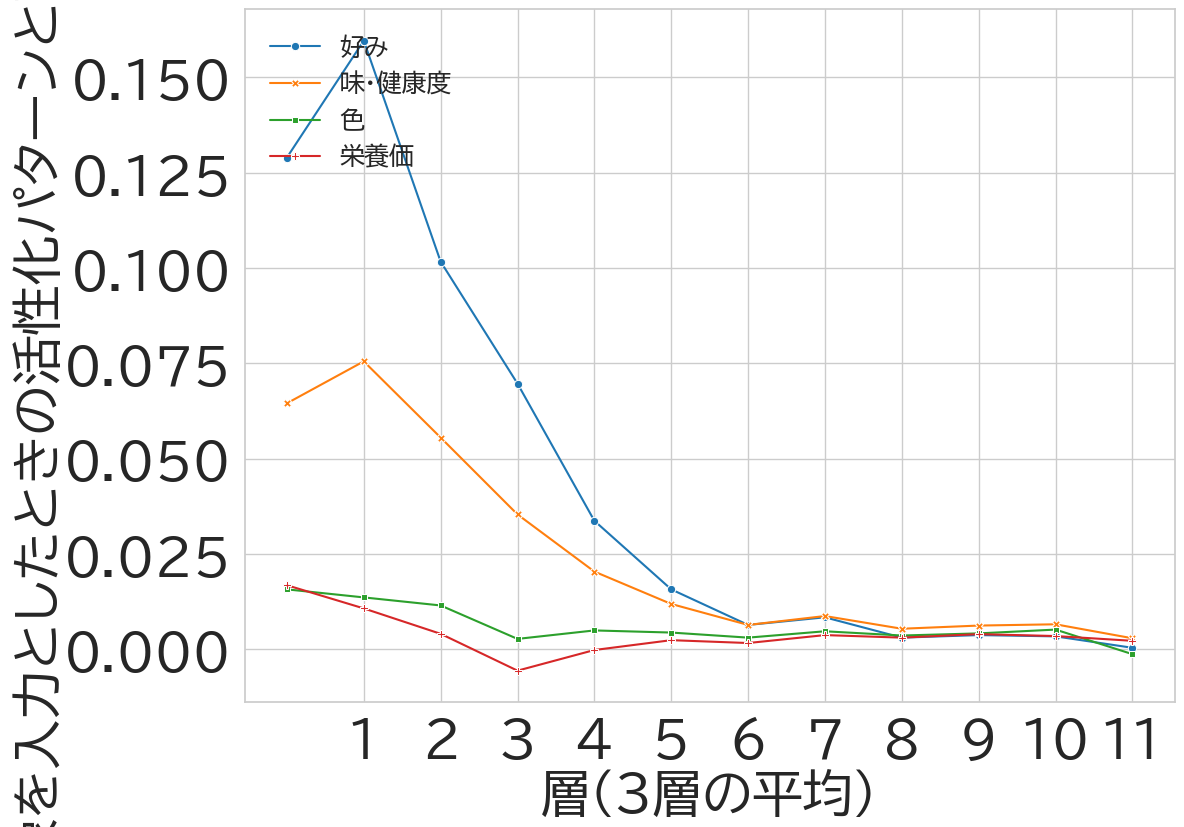

In [ ]:
df_corr = pd.concat(
    [
        likeness_corr,
        healthiness_corr,
        tastiness_corr,
        kcal_100g_corr,
        protein_100g_corr,
        fat_100g_corr,
        carbs_100g_corr,
        kcals_corr,
        processed_corr,
        testy_corr,
        grams_corr,
        red_corr,
        green_corr,
        blue_corr,
    ],
    axis=1,
)
group_dict = {
    "好み": ["Likeness"],
    "味・健康度": ["Healthiness", "Tastiness"],
    "色": ["Red", "Green", "Blue"],
    "栄養価": ["Kcal_100g", "protein_100g", "fat_100g", "carbs_100g"],
    # "Size": ["Kcals", "Grams"],
}
data = pd.DataFrame(
    {
        key: df_corr[attrs]
        .mean(axis=1)
        .rolling(window=3, min_periods=1, step=3)
        .mean()
        .dropna()
        .reset_index(drop=True)
        for key, attrs in group_dict.items()
    }
)


fig = plt.figure(figsize=(12, 9))
sns.lineplot(data=data, dashes=False, markers=True, palette="tab10")
plt.xlabel("層(３層の平均)", fontsize=36)
plt.ylabel("関連度（各画像を入力としたときの活性化パターンと画像属性との相関）", fontsize=36)
plt.yticks(fontsize=36)
plt.xticks(fontsize=36)
plt.xticks(range(1, max(data.index.to_series().unique()) + 1))
plt.legend(fontsize=18, loc="upper left", borderpad=0.5, labelspacing=0.5, framealpha=0)

plt.show()
fig.savefig(
    os.path.join(DATA_PATH, "output", "RSA", "result.png")
)